In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/LeHoangViet03/Fintech-CYTech/main/Titanic_train.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Part 1**

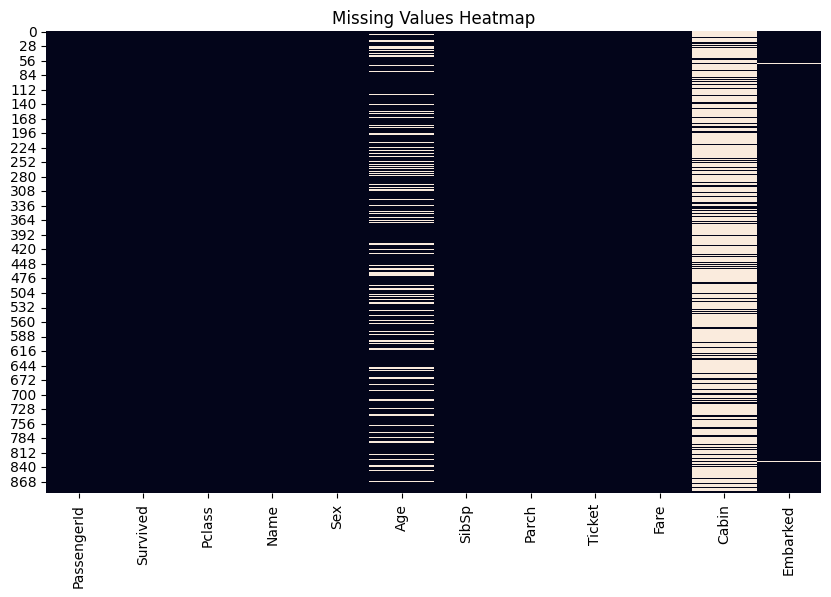

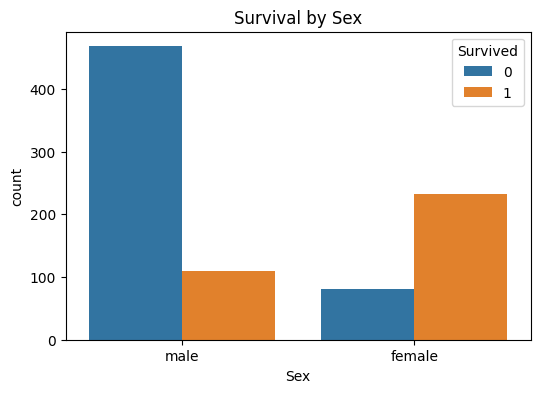

Survival rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 



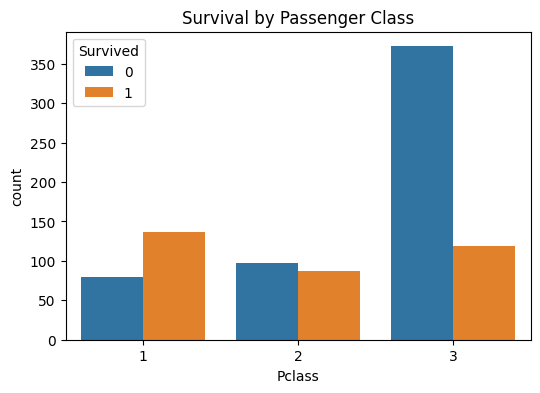

Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 



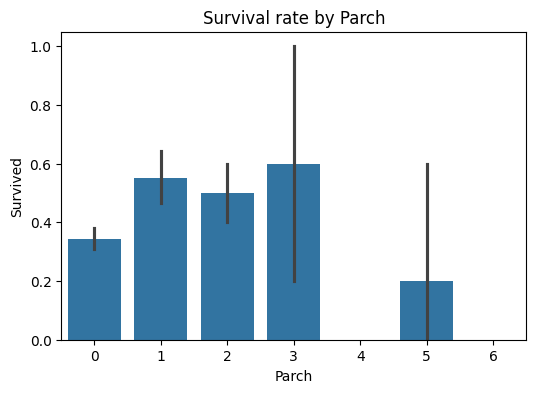

Survival rate by Parch:
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64 



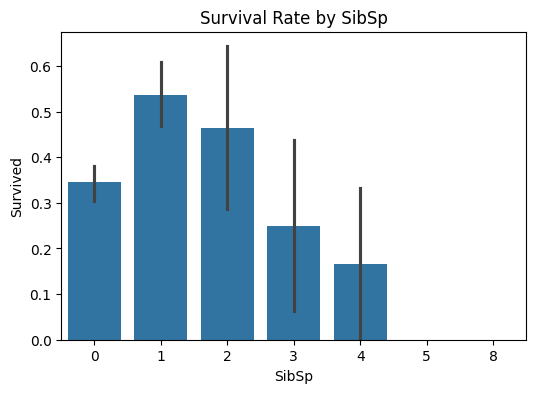

Survival rate by SibSp:
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64 



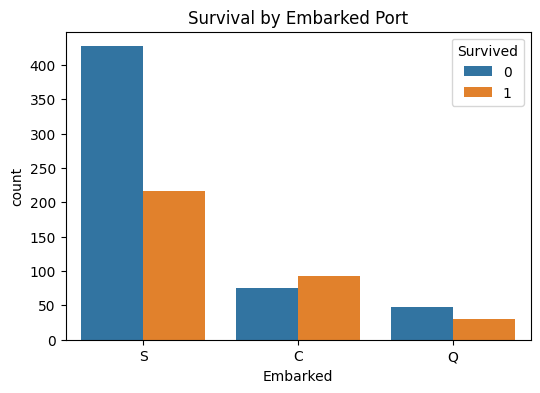

Survival rate by Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64 



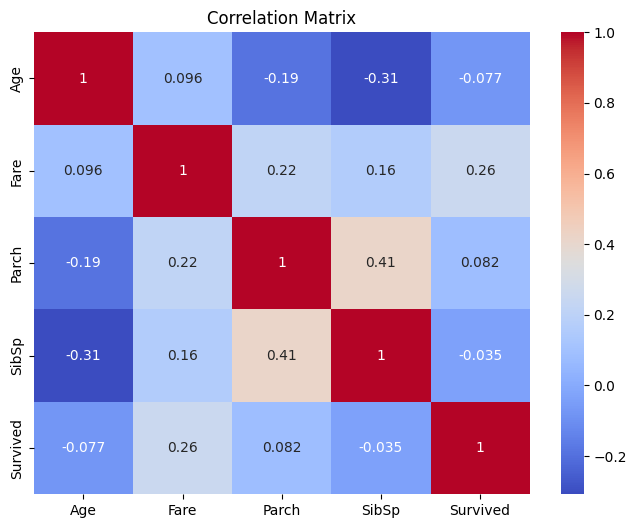

In [4]:
# 1. Missing data heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# 2. Survival by Sex

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival by Sex")
plt.show()

print("Survival rate by Sex:")
print(df.groupby("Sex")["Survived"].mean(), "\n")

# 3. Survival by Pclass

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Survival by Passenger Class")
plt.show()

print("Survival rate by Pclass:")
print(df.groupby("Pclass")["Survived"].mean(), "\n")

# 4. Survival by Parch

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="Parch", y="Survived")
plt.title("Survival rate by Parch")
plt.show()

print("Survival rate by Parch:")
print(df.groupby("Parch")["Survived"].mean(), "\n")

# 5. Survival by SibSp
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="SibSp", y="Survived")
plt.title("Survival Rate by SibSp")
plt.show()

print("Survival rate by SibSp:")
print(df.groupby("SibSp")["Survived"].mean(), "\n")

# 6. Survival by Embarked

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Embarked", hue="Survived")
plt.title("Survival by Embarked Port")
plt.show()

print("Survival rate by Embarked:")
print(df.groupby("Embarked")["Survived"].mean(), "\n")

# 7. Correlation Heatmap (numeric columns)

numeric_df = df[["Age", "Fare", "Parch", "SibSp", "Survived"]]

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


The features most correlated with survival are Sex, Pclass, and Fare. Women and 1st-class passengers survived much more often, making these the strongest predictors. Fare has a moderate positive correlation (wealthier passengers survived more). Numerical variables like Age, Parch, and SibSp show only weak correlations on their own, although small families tend to survive more than people alone or in large groups.

# **Part 2**

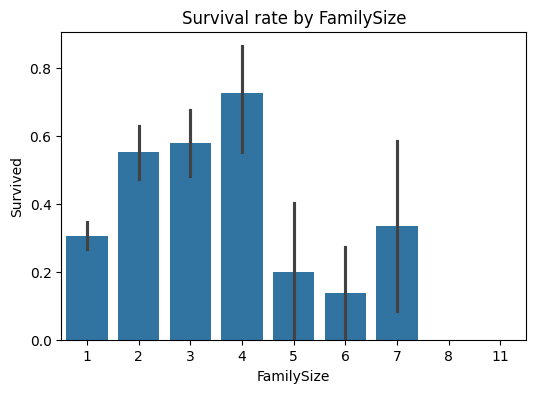

Correlation between FamilySize and Survived: 0.01663898928274523
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   Fare         891 non-null    float64
 5   FamilySize   891 non-null    int64  
 6   Sex_male     891 non-null    int64  
 7   Embarked_Q   891 non-null    int64  
 8   Embarked_S   891 non-null    int64  
 9   Title_Miss   891 non-null    int64  
 10  Title_Mr     891 non-null    int64  
 11  Title_Mrs    891 non-null    int64  
 12  Title_Rare   891 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 90.6 KB
None


,PassengerId,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,22.0,7.2500,2,1,0,1,0,1,0,0
1,2,1,1,38.0,71.2833,2,0,0,0,0,0,1,0
2,3,1,3,26.0,7.9250,1,0,0,1,1,0,0,0
3,4,1,1,35.0,53.1000,2,0,0,1,0,0,1,0
4,5,0,3,35.0,8.0500,1,1,0,1,0,1,0,0


In [5]:
# Extract Title from Name
df["Title"] = df["Name"].str.extract(r",\s*([^\.]*)\s*\.", expand=False)

# Map "rare" or equivalent titles
title_map = {
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mme": "Mrs",
}

df["Title"] = df["Title"].replace(title_map)

# Group any remaining very rare titles
rare_titles = df["Title"].value_counts()
rare_titles = rare_titles[rare_titles < 10].index # rare if appears less than 10 times
df["Title"] = df["Title"].replace(rare_titles, "Rare")

# FamilySize Feature

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Plot survival rate by FamilySize
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="FamilySize", y="Survived")
plt.title("Survival rate by FamilySize")
plt.show()

print("Correlation between FamilySize and Survived:",
      df[["FamilySize", "Survived"]].corr().iloc[0,1])

# Drop columns

df = df.drop(columns=["Name", "Ticket", "Cabin", "SibSp", "Parch"])

# Option B: One-hot Encoding
df = pd.get_dummies(df, columns=["Sex", "Embarked", "Title"], drop_first=True)
df = df.astype({col: "int" for col in df.select_dtypes("bool").columns})


print(df.info())
df.head()


### **Title Extraction**

Titles were extracted from the `Name` column and grouped into common categories (`Mr`, `Mrs`, `Miss`) and a single `Rare` category for other titles.


### **Family Size**

A new feature `FamilySize = SibSp + Parch + 1` was created to represent the total number of family members travelling together.
The survival plot shows that passengers traveling in smaller families had higher survival rates than those traveling alone or in very large families.
The linear correlation between `FamilySize` and `Survived` is close to zero, which can by justified because the relationship is non-linear.

### **Encoding Choice**

**Option B: One-Hot Encoding** was chosen.

One-hot encoding was chosen as it avoids introducing an artificial order between categories (for example between `Mr`, `Mrs` and `Miss`) that would result from label encoding. This approach also ensures all categorical variables are converted into numeric.




# **Part 3**

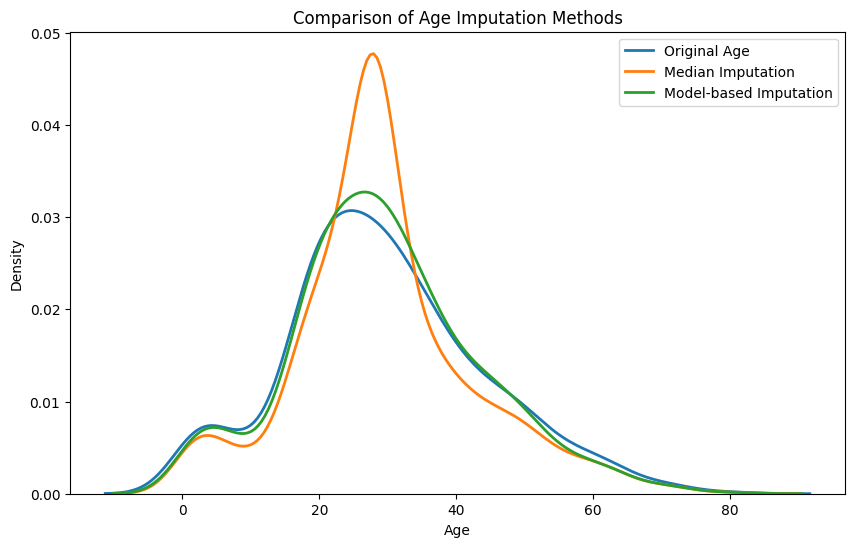

In [6]:
# Predicting missing values for Age

from sklearn.ensemble import RandomForestRegressor

# Create two datasets

# Median-based imputation (to compare)
df_median = df.copy()
df_median["Age"] = df_median["Age"].fillna(df_median["Age"].median())

# Model-based imputation
df_model = df.copy()

# Train regressor for Age

# Select features that should help predict Age
age_features = [
    "Pclass", "Fare", "FamilySize",
    "Sex_male", "Embarked_Q", "Embarked_S",
    "Title_Miss", "Title_Mr", "Title_Mrs", "Title_Rare"
]

# Rows where Age is known
train_age = df_model[df_model["Age"].notna()]
# Rows where Age is missing
predict_age = df_model[df_model["Age"].isna()]

X_train_age = train_age[age_features]
y_train_age = train_age["Age"]

X_pred_age = predict_age[age_features]

# Fit the regressor
age_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
age_model.fit(X_train_age, y_train_age)

# Predict missing ages
age_pred = age_model.predict(X_pred_age)

# Fill predictions back into df_model
df_model.loc[df_model["Age"].isna(), "Age"] = age_pred

# KDE visualization comparison

plt.figure(figsize=(10, 6))
sns.kdeplot(df["Age"], label="Original Age", linewidth=2)
sns.kdeplot(df_median["Age"], label="Median Imputation", linewidth=2)
sns.kdeplot(df_model["Age"], label="Model-based Imputation", linewidth=2)
plt.title("Comparison of Age Imputation Methods")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()
